### Problem Statement
Access an open source dataset “Titanic”. Apply pre-processing techniques on the raw dataset.

In [25]:
%config Completer.use_jedi = False

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns



In [27]:
data = pd.read_csv('kaggle_titanic_dataset.csv',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [29]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0, 0.5, 'Passenger Count')

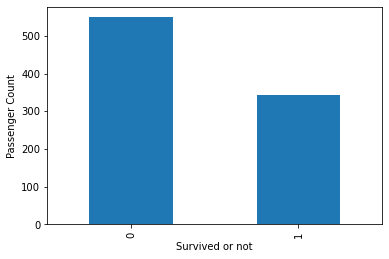

In [31]:
# class imbalance
plt = data.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

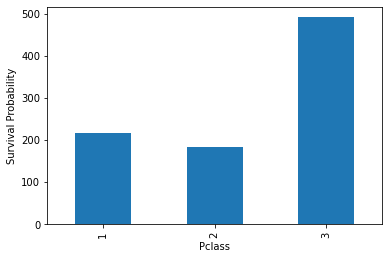

In [32]:
plt = data.Pclass.value_counts().sort_index().plot(kind='bar', title='')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Text(0, 0.5, 'Survival Probability')

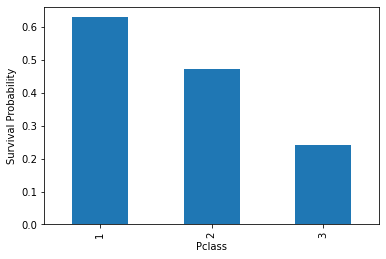

In [33]:
plt = data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

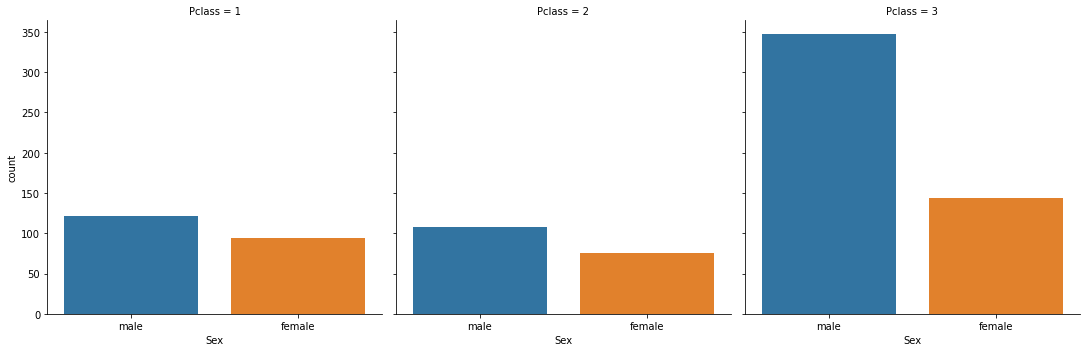

In [34]:
sns.factorplot('Sex', col = 'Pclass', data = data, kind = 'count')


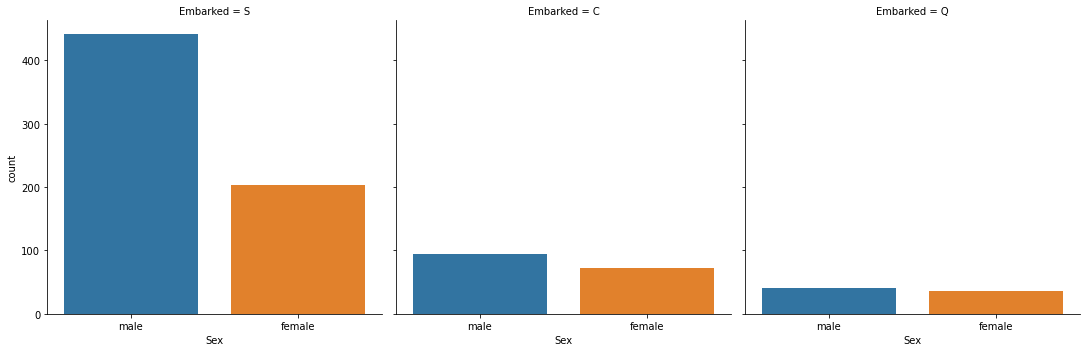

In [35]:
sns.factorplot('Sex', col = 'Embarked', data = data, kind = 'count')


In [36]:
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# dropping unnecessary columns
data.drop(labels=['Ticket','Embarked','Cabin','Name'], axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,Mr
2,1,1,female,38.0,1,0,71.2833,Mrs
3,1,3,female,26.0,0,0,7.9250,Miss
4,1,1,female,35.0,1,0,53.1000,Mrs
5,0,3,male,35.0,0,0,8.0500,Mr


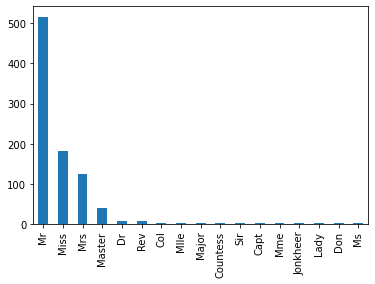

In [38]:
data.Title.value_counts().plot(kind='bar')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
# filling missing age values
data['Age'].fillna(value=data['Age'].mean(), inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.000000,1,0,7.2500
2,1,1,female,38.000000,1,0,71.2833
3,1,3,female,26.000000,0,0,7.9250
4,1,1,female,35.000000,1,0,53.1000
5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000
888,1,1,female,19.000000,0,0,30.0000
889,0,3,female,29.699118,1,2,23.4500


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


In [12]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
survived_age = data[['Age','Survived']].groupby('Age').count()
survived_age.head()

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1


<AxesSubplot:xlabel='Age'>

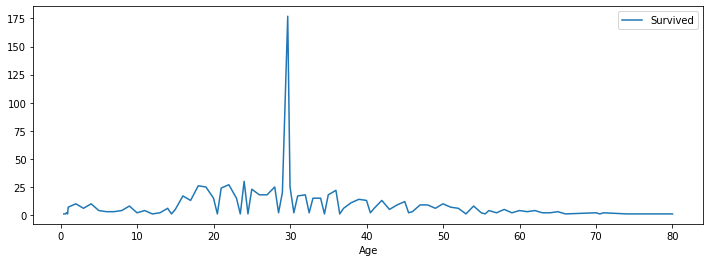

In [14]:
survived_age.plot(kind='line',figsize=(12,4))

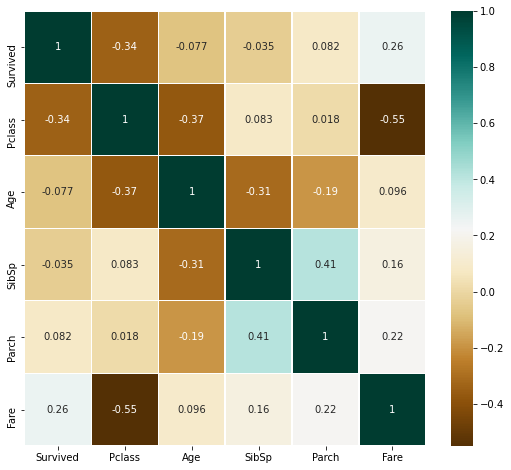

In [41]:
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)